In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DIVISIONS, select_scl5_regular_season, SCL5_DROPPED_PLAYERS
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.outcomes import WinType
from triple_agent.reports.specific.game_durations import game_durations
from triple_agent.reports.specific.scl_set_scores import game_differential
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

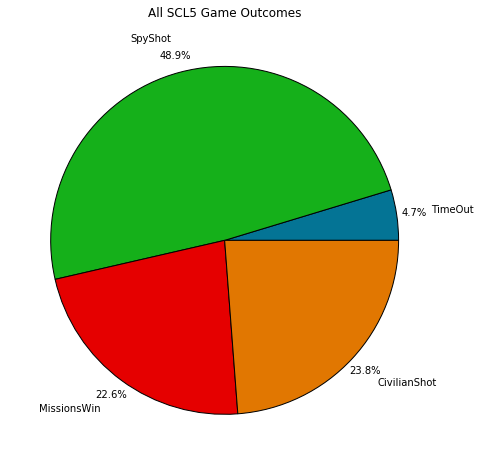

DataPlotProperties(frame=     WinType.TimeOut  WinType.SpyShot  WinType.MissionsWin  \
NaN              198             2066                  955   

     WinType.CivilianShot  
NaN                  1005  , stacks_are_categories=True)

In [5]:
game_outcomes(
    scl5_replays,
    axis_properties=AxisProperties(title="All SCL5 Game Outcomes")
)

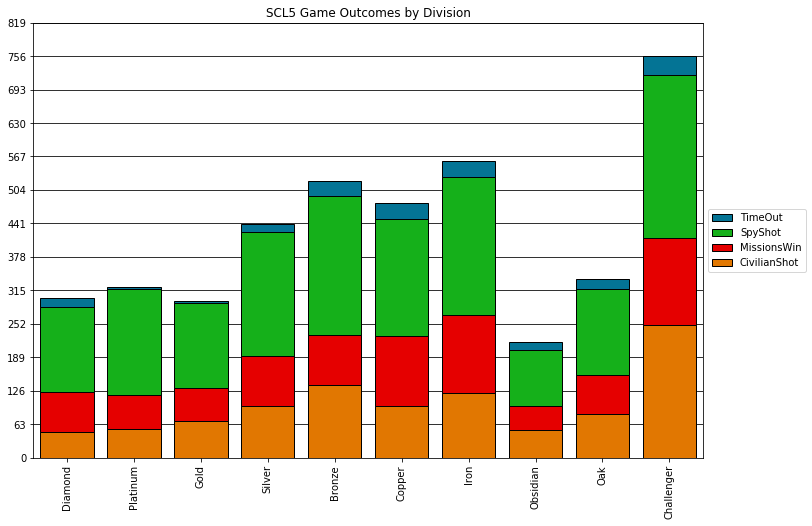

DataPlotProperties(frame=                      Diamond  Platinum  Gold  Silver  Bronze  Copper  Iron  \
WinType.TimeOut            16         5     3      16      28      30    30   
WinType.SpyShot           160       199   160     232     262     220   259   
WinType.MissionsWin        75        65    63      95      95     131   148   
WinType.CivilianShot       49        53    68      97     136      98   121   

                      Obsidian  Oak  Challenger  
WinType.TimeOut             16   18          36  
WinType.SpyShot            105  163         306  
WinType.MissionsWin         45   73         165  
WinType.CivilianShot        52   82         249  , stacks_are_categories=False)

In [6]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0])
    ),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division")
)

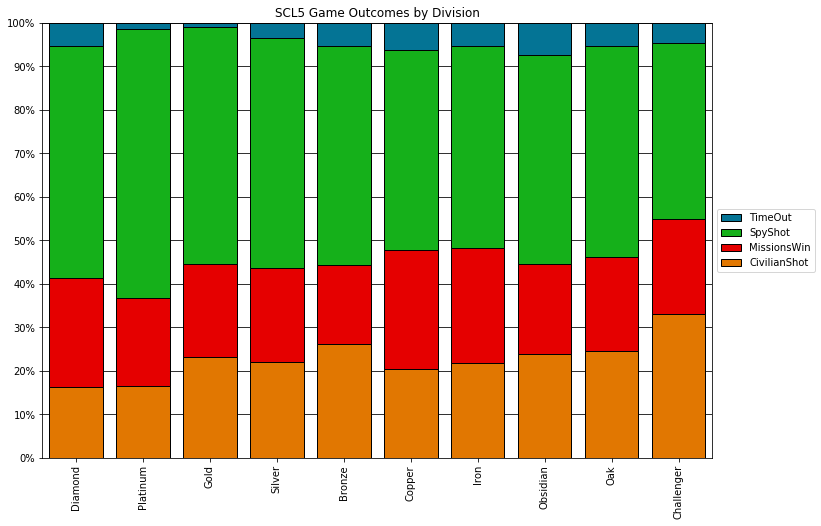

DataPlotProperties(frame=                       Diamond  Platinum      Gold    Silver    Bronze  \
WinType.TimeOut       0.053333  0.015528  0.010204  0.036364  0.053743   
WinType.SpyShot       0.533333  0.618012  0.544218  0.527273  0.502879   
WinType.MissionsWin   0.250000  0.201863  0.214286  0.215909  0.182342   
WinType.CivilianShot  0.163333  0.164596  0.231293  0.220455  0.261036   

                        Copper      Iron  Obsidian       Oak  Challenger  
WinType.TimeOut       0.062630  0.053763  0.073394  0.053571    0.047619  
WinType.SpyShot       0.459290  0.464158  0.481651  0.485119    0.404762  
WinType.MissionsWin   0.273486  0.265233  0.206422  0.217262    0.218254  
WinType.CivilianShot  0.204593  0.216846  0.238532  0.244048    0.329365  , stacks_are_categories=False)

In [7]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Division")
)

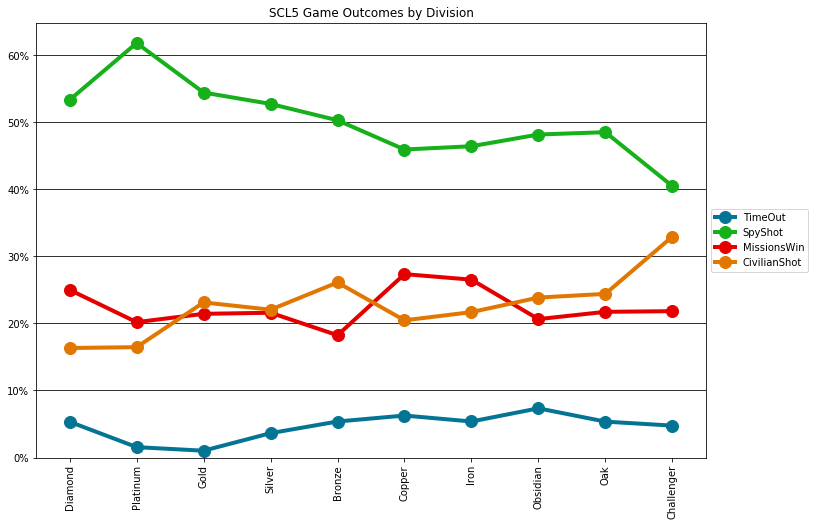

DataPlotProperties(frame=                       Diamond  Platinum      Gold    Silver    Bronze  \
WinType.TimeOut       0.053333  0.015528  0.010204  0.036364  0.053743   
WinType.SpyShot       0.533333  0.618012  0.544218  0.527273  0.502879   
WinType.MissionsWin   0.250000  0.201863  0.214286  0.215909  0.182342   
WinType.CivilianShot  0.163333  0.164596  0.231293  0.220455  0.261036   

                        Copper      Iron  Obsidian       Oak  Challenger  
WinType.TimeOut       0.062630  0.053763  0.073394  0.053571    0.047619  
WinType.SpyShot       0.459290  0.464158  0.481651  0.485119    0.404762  
WinType.MissionsWin   0.273486  0.265233  0.206422  0.217262    0.218254  
WinType.CivilianShot  0.204593  0.216846  0.238532  0.244048    0.329365  , stacks_are_categories=False)

In [8]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(
        title="SCL5 Game Outcomes by Division",
        force_line=True
    )
)

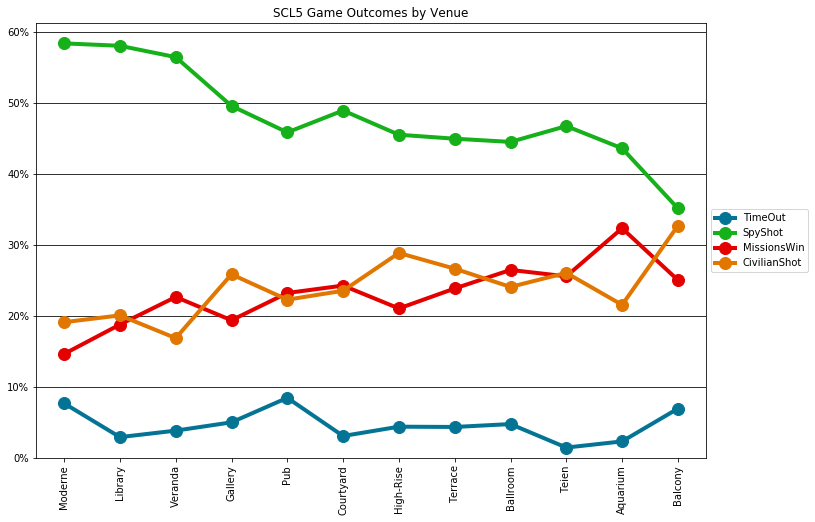

DataPlotProperties(frame=                       Moderne   Library   Veranda   Gallery       Pub  \
WinType.TimeOut       0.077114  0.029520  0.038647  0.050360  0.084906   
WinType.SpyShot       0.584577  0.581181  0.565217  0.496403  0.459119   
WinType.MissionsWin   0.146766  0.188192  0.227053  0.194245  0.232704   
WinType.CivilianShot  0.191542  0.201107  0.169082  0.258993  0.223270   

                      Courtyard  High-Rise   Terrace  Ballroom     Teien  \
WinType.TimeOut        0.031079   0.044218  0.043825  0.047882  0.014778   
WinType.SpyShot        0.489945   0.455782  0.450199  0.445672  0.467980   
WinType.MissionsWin    0.243144   0.210884  0.239044  0.265193  0.256158   
WinType.CivilianShot   0.235832   0.289116  0.266932  0.241252  0.261084   

                      Aquarium   Balcony  
WinType.TimeOut       0.023474  0.069686  
WinType.SpyShot       0.436620  0.351916  
WinType.MissionsWin   0.323944  0.250871  
WinType.CivilianShot  0.215962  0.327526  , stacks_

In [9]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True),
    axis_properties=AxisProperties(
        title="SCL5 Game Outcomes by Venue",
        savefig='example_pictures/scl5_venue_outcomes_line.png',
        force_line=True)
)

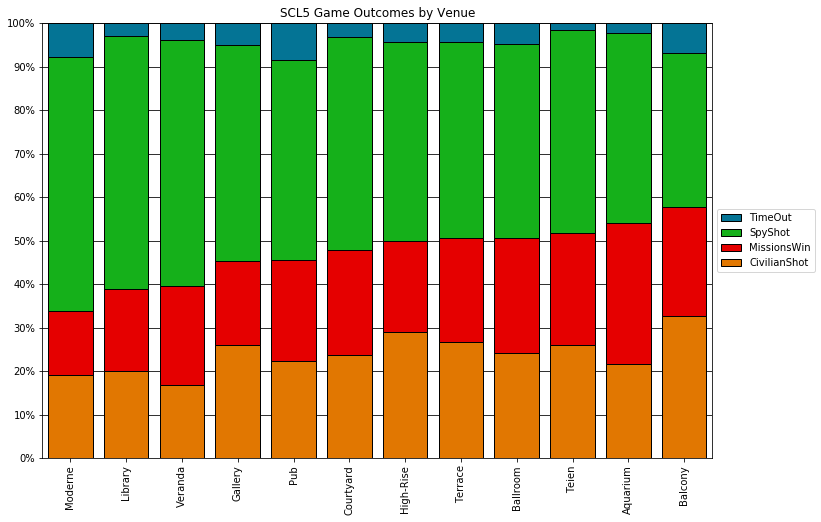

DataPlotProperties(frame=                       Moderne   Library   Veranda   Gallery       Pub  \
WinType.TimeOut       0.077114  0.029520  0.038647  0.050360  0.084906   
WinType.SpyShot       0.584577  0.581181  0.565217  0.496403  0.459119   
WinType.MissionsWin   0.146766  0.188192  0.227053  0.194245  0.232704   
WinType.CivilianShot  0.191542  0.201107  0.169082  0.258993  0.223270   

                      Courtyard  High-Rise   Terrace  Ballroom     Teien  \
WinType.TimeOut        0.031079   0.044218  0.043825  0.047882  0.014778   
WinType.SpyShot        0.489945   0.455782  0.450199  0.445672  0.467980   
WinType.MissionsWin    0.243144   0.210884  0.239044  0.265193  0.256158   
WinType.CivilianShot   0.235832   0.289116  0.266932  0.241252  0.261084   

                      Aquarium   Balcony  
WinType.TimeOut       0.023474  0.069686  
WinType.SpyShot       0.436620  0.351916  
WinType.MissionsWin   0.323944  0.250871  
WinType.CivilianShot  0.215962  0.327526  , stacks_

In [10]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True),
    axis_properties=AxisProperties(
        title="SCL5 Game Outcomes by Venue",
        savefig='example_pictures/scl5_venue_outcomes_stacked.png')
)

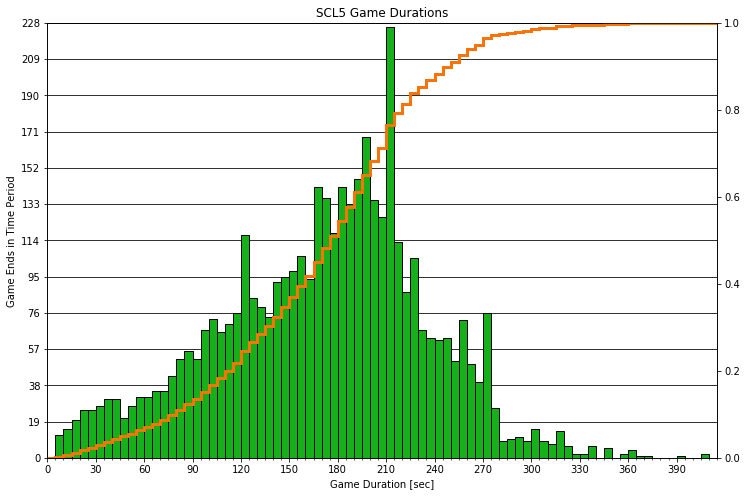

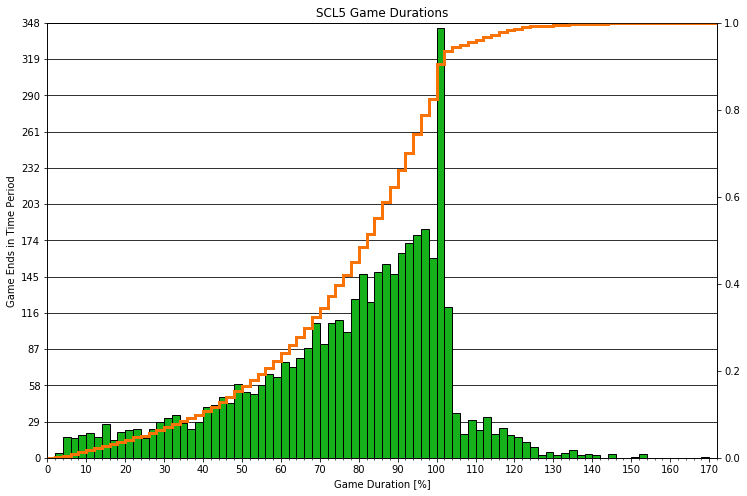

In [11]:
game_durations(scl5_replays, "SCL5 Game Durations")

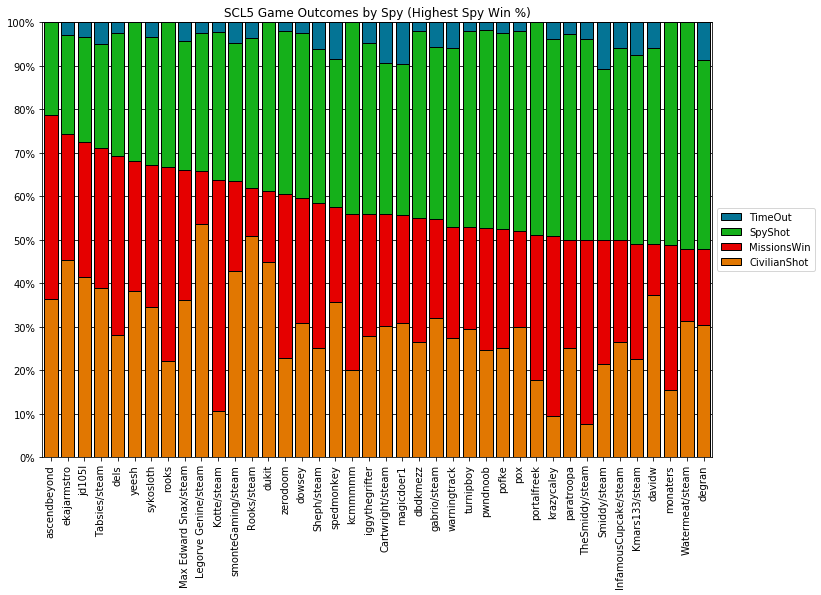

DataPlotProperties(frame=                      ascendbeyond  ekajarmstro    jd105l  Tabsies/steam  \
WinType.TimeOut           0.000000     0.030303  0.034483       0.050847   
WinType.SpyShot           0.212121     0.227273  0.241379       0.237288   
WinType.MissionsWin       0.424242     0.287879  0.310345       0.322034   
WinType.CivilianShot      0.363636     0.454545  0.413793       0.389831   

                          dels     yeesh  sykosloth     rooks  \
WinType.TimeOut       0.025641  0.000000   0.032787  0.000000   
WinType.SpyShot       0.282051  0.319149   0.295082  0.333333   
WinType.MissionsWin   0.410256  0.297872   0.327869  0.444444   
WinType.CivilianShot  0.282051  0.382979   0.344262  0.222222   

                      Max Edward Snax/steam  Legorve Genine/steam  ...  \
WinType.TimeOut                    0.042553              0.024390  ...   
WinType.SpyShot                    0.297872              0.317073  ...   
WinType.MissionsWin                0.297872   

In [12]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        limit=40,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Spy (Highest Spy Win %)")
)

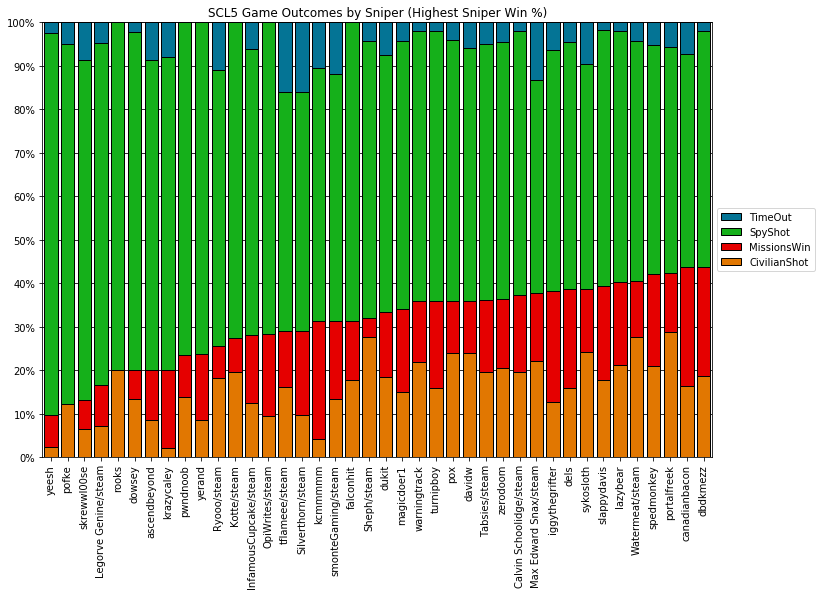

DataPlotProperties(frame=                         yeesh     pofke  skrewwl00se  Legorve Genine/steam  \
WinType.TimeOut       0.024390  0.048780     0.086957              0.047619   
WinType.SpyShot       0.878049  0.829268     0.782609              0.785714   
WinType.MissionsWin   0.073171  0.000000     0.065217              0.095238   
WinType.CivilianShot  0.024390  0.121951     0.065217              0.071429   

                      rooks    dowsey  ascendbeyond  krazycaley  pwndnoob  \
WinType.TimeOut         0.0  0.022222      0.085714        0.08  0.000000   
WinType.SpyShot         0.8  0.777778      0.714286        0.72  0.764706   
WinType.MissionsWin     0.0  0.066667      0.114286        0.18  0.098039   
WinType.CivilianShot    0.2  0.133333      0.085714        0.02  0.137255   

                        yerand  ...  iggythegrifter      dels  sykosloth  \
WinType.TimeOut       0.000000  ...        0.063830  0.045455   0.096774   
WinType.SpyShot       0.762712  ...      

In [13]:
game_outcomes(
    scl5_replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        limit=40,
        percent_normalized_data=True),
    axis_properties=AxisProperties(title="SCL5 Game Outcomes by Sniper (Highest Sniper Win %)")
)